## Entregable 2 Seminario


Vanessa Restrepo Correa
cc. 1017181948

Viviana Sánchez Jiménez
cc. 1036621926

Departamento: Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

Facultad de Ingeniería - Universidad de Antioquia

## Preparación del dataset




## Librerias y configuraciones previas

In [35]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Carga del dataset

Este dataset contiene la información de los pacientes mayores de 59 años internados en un hospital de cuarto nivel de complejidad de la ciudad de Medellín.
Tiene los datos de 18092 egresos hospitalarios desde el año 2021 hasta la fecha. Incluye 42 variables de interés las cuales ayudarán con la predicción de la duración de la estancia, incluyen datos generales del paciente como edad, sexo, información clínica como diagnósticos, procedimientos quirúrgicos y no quirúrgicos, además contiene 1 variable respuesta que representa la duración de la estancia expresada en días.


In [104]:
#Cargar el dataset
d=pd.read_csv('/Seminario3.csv',header=0, sep=',')
print (d.shape)
print (d.head(10))

(18092, 23)
   Episodio  Edad  Sexo  Identificador_Unico Fecha_Nacimiento Fecha_Ingreso  \
0   4937299    67     2        4937299343116       01/05/1953    30/12/2020   
1   4931823    90     1       49318231389525       20/04/1930    24/12/2020   
2   4931869    91     2       49318691390575       05/08/1929    25/12/2020   
3   4936745    85     1        4936745349686       14/03/1935    30/12/2020   
4   4934520    86     1       49345201300673       03/06/1934    29/12/2020   
5   4932795    70     1        4932795564749        3/10/1950    27/12/2020   
6   4930764    65     2        4930764647803       30/05/1955    23/12/2020   
7   4906289    69     1       49062891332670       09/05/1951     7/12/2020   
8   4931335    81     2        4931335644849       09/05/1939    23/12/2020   
9   4932427    67     1       49324271390764       03/07/1953    26/12/2020   

  Fecha_Egreso Diagnostico_principal_Egreso  Cantidad_comorbilidades Tuvo_cx  \
0   01/01/2021                        

# Limpieza de datos (Data Cleaning)

In [105]:
# Revisando la información del dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Episodio                      18092 non-null  int64 
 1   Edad                          18092 non-null  int64 
 2   Sexo                          18092 non-null  int64 
 3   Identificador_Unico           18092 non-null  int64 
 4   Fecha_Nacimiento              18092 non-null  object
 5   Fecha_Ingreso                 18092 non-null  object
 6   Fecha_Egreso                  18092 non-null  object
 7   Diagnostico_principal_Egreso  18092 non-null  object
 8   Cantidad_comorbilidades       18092 non-null  int64 
 9   Tuvo_cx                       18092 non-null  object
 10  Procedimiento_1               18092 non-null  object
 11  Ventilacion_Mecanica          18092 non-null  object
 12  Situacion_al_alta             18092 non-null  int64 
 13  Muerte          

In [106]:
#Mostramos los datos del dataset
d.head()

,Episodio,Edad,Sexo,Identificador_Unico,Fecha_Nacimiento,Fecha_Ingreso,Fecha_Egreso,Diagnostico_principal_Egreso,Cantidad_comorbilidades,Tuvo_cx,...,Muerte,UCI,UCE,UCIE,Estancia_en_UCI,Estancia_en_UCE,Nombre_Especialidad_Egreso,Descripcion_empresa,Unidad_Hospitalizacion,Estancia
0,4937299,67,2,4937299343116,01/05/1953,30/12/2020,01/01/2021,S728,8,Si,...,No,No,No,No,NaN,NaN,ORTOPEDIA Y TRAUMATOLOGIA,E.P.S. REGIMEN CONTRIB COMPART,B-04-UNIDAD 2 HOSP ADULTO,2
1,4931823,90,1,49318231389525,20/04/1930,24/12/2020,01/01/2021,U071,6,No,...,No,No,No,No,NaN,NaN,MEDICINA INTERNA,E.P.S. REGIMEN SUBSIDIADO,B-04-UNIDAD 2 HOSP ADULTO,8
2,4931869,91,2,49318691390575,05/08/1929,25/12/2020,01/01/2021,U071,11,No,...,Si,No,No,No,NaN,NaN,MEDICINA INTERNA,E.P.S. REGIMEN CONTRIBUTIVO,B-04-UNIDAD 1 HOSP ADULTOS,7
3,4936745,85,1,4936745349686,14/03/1935,30/12/2020,01/01/2021,M808,18,No,...,No,No,No,No,NaN,NaN,NEUROCIRUGIA,E.P.S. REGIMEN CONTRIBUTIVO,B-04-UNIDAD 2 HOSP ADULTO,2
4,4934520,86,1,49345201300673,03/06/1934,29/12/2020,01/01/2021,U071,11,No,...,No,No,No,No,NaN,NaN,MEDICINA INTERNA,EMPRESA MEDICINA PREPAG COMPAR,B-08-UNIDAD 1 HOSP ADULTOS,3


In [107]:
#Borrando columnas que no se emplearán

d.drop([ 'Episodio','Identificador_Unico','Fecha_Ingreso','Fecha_Egreso','Fecha_Nacimiento','Estancia_en_UCI','Estancia_en_UCE','Muerte','UCIE','Unidad_Hospitalizacion','Descripcion_empresa'], axis='columns', inplace=True)

In [108]:
#Mostramos los datos del dataset
d.head()

,Edad,Sexo,Diagnostico_principal_Egreso,Cantidad_comorbilidades,Tuvo_cx,Procedimiento_1,Ventilacion_Mecanica,Situacion_al_alta,UCI,UCE,Nombre_Especialidad_Egreso,Estancia
0,67,2,S728,8,Si,Si,No,1,No,No,ORTOPEDIA Y TRAUMATOLOGIA,2
1,90,1,U071,6,No,Si,No,1,No,No,MEDICINA INTERNA,8
2,91,2,U071,11,No,Si,No,2,No,No,MEDICINA INTERNA,7
3,85,1,M808,18,No,Si,No,1,No,No,NEUROCIRUGIA,2
4,86,1,U071,11,No,Si,No,1,No,No,MEDICINA INTERNA,3


NOTA: Es importante que el número de muestras de cada característica sea igual al número de muestras o filas de la base de datos original. Sin embargo, este tipo de exploración de datos no garantiza que exista datos faltantes o con caracteres extraños. Por esta razón, se recomienda hacer una exploración exhaustiva de la base de datos.

In [109]:
# Se realiza la busqueda de caracteres especiales o inusuales en cada variable del dataset

Edad = list(d['Edad'].value_counts().index)
Sexo = list(d['Sexo'].value_counts().index)
Diagnostico_principal_Egreso = list(d['Diagnostico_principal_Egreso'].value_counts().index)
Cantidad_comorbilidades = list(d['Cantidad_comorbilidades'].value_counts().index)
Tuvo_cx = list(d['Tuvo_cx'].value_counts().index)
Procedimiento_1 = list(d['Procedimiento_1'].value_counts().index)
Ventilacion_Mecanica = list(d['Ventilacion_Mecanica'].value_counts().index)
Situacion_al_alta = list(d['Situacion_al_alta'].value_counts().index)
UCI = list(d['UCI'].value_counts().index)
UCE = list(d['UCE'].value_counts().index)
Nombre_Especialidad_Egreso = list(d['Nombre_Especialidad_Egreso'].value_counts().index)
Estancia = list(d['Estancia'].value_counts().index)
display([[Edad,Sexo,Diagnostico_principal_Egreso,Cantidad_comorbilidades,Tuvo_cx,Procedimiento_1,Ventilacion_Mecanica,Situacion_al_alta,UCI,UCE,Nombre_Especialidad_Egreso,Estancia]])

[[[68,
   69,
   70,
   66,
   71,
   72,
   65,
   74,
   67,
   73,
   76,
   75,
   79,
   77,
   80,
   78,
   82,
   83,
   84,
   81,
   64,
   60,
   61,
   63,
   85,
   86,
   62,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   99,
   98,
   100,
   101,
   102,
   105,
   104,
   106,
   103],
  [2, 1],
  ['U071',
   'N390',
   'I500',
   'J441',
   'M480',
   'A418',
   'N40X',
   'R572',
   'I678',
   'J960',
   'I214',
   'C61X',
   'T814',
   'S065',
   'M511',
   'C349',
   'M171',
   'K746',
   'S721',
   'J690',
   'A090',
   'K573',
   'I269',
   'I213',
   'J159',
   'I211',
   'N178',
   'A419',
   'I638',
   'S720',
   'K565',
   'I775',
   'J181',
   'K800',
   'J440',
   'M161',
   'C900',
   'C169',
   'A499',
   'E871',
   'I620',
   'I771',
   'K566',
   'C679',
   'M808',
   'M175',
   'G458',
   'A047',
   'I10X',
   'K830',
   'L031',
   'K729',
   'C833',
   'J189',
   'M545',
   'C229',
   'C73X',
   'J90X',
   'I200',
   '

Se deben convertir algunas variables de tipo entero a object debido que aunque son numeros no corresponden a variables numericas. Por tal motivo, las unicas variables que nos quedan como numericas son Edad, cantidad de comorbilidades y Estancia (días)

In [110]:
#Convertir las variables tipo int a object
columnas_int = ['Sexo','Situacion_al_alta']
d[columnas_int] = d[columnas_int].astype(object)

print(d.dtypes)

Edad                             int64
Sexo                            object
Diagnostico_principal_Egreso    object
Cantidad_comorbilidades          int64
Tuvo_cx                         object
Procedimiento_1                 object
Ventilacion_Mecanica            object
Situacion_al_alta               object
UCI                             object
UCE                             object
Nombre_Especialidad_Egreso      object
Estancia                         int64
dtype: object


In [111]:
#Lista de variables categóricas
Vcategoricas = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[Vcategoricas].head()

,Sexo,Diagnostico_principal_Egreso,Tuvo_cx,Procedimiento_1,Ventilacion_Mecanica,Situacion_al_alta,UCI,UCE,Nombre_Especialidad_Egreso
0,2,S728,Si,Si,No,1,No,No,ORTOPEDIA Y TRAUMATOLOGIA
1,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA
2,2,U071,No,Si,No,2,No,No,MEDICINA INTERNA
3,1,M808,No,Si,No,1,No,No,NEUROCIRUGIA
4,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA


In [112]:
#Lista de variables numéricas

Vnumericas=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

#Se elimina la variable ESTANCIA de la lista de variables numéricas, debido a que esta es la variable de salida
Vnumericas.remove('Estancia')

d[Vnumericas].head()

,Edad,Cantidad_comorbilidades
0,67,8
1,90,6
2,91,11
3,85,18
4,86,11


In [113]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

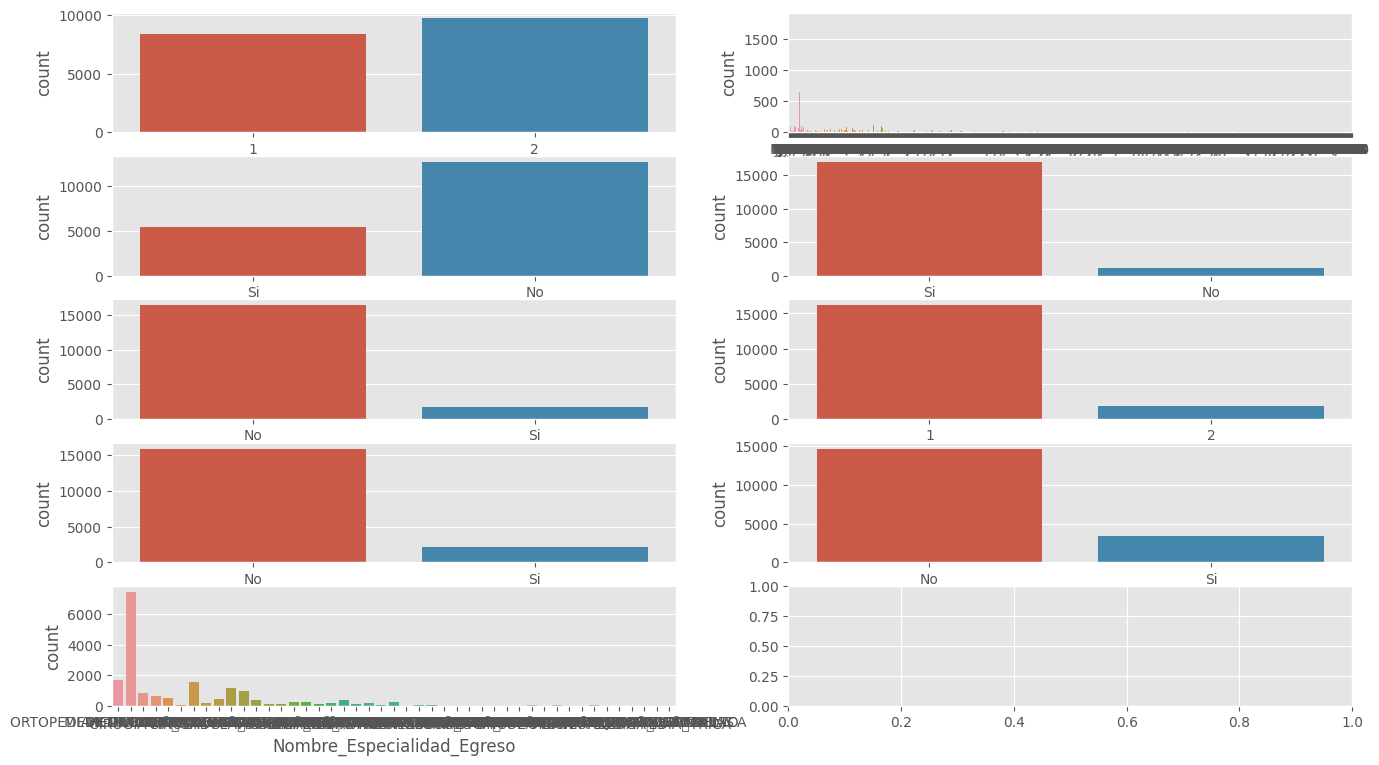

In [114]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,Vcategoricas, 2, 5, 'c', None, (16,9))

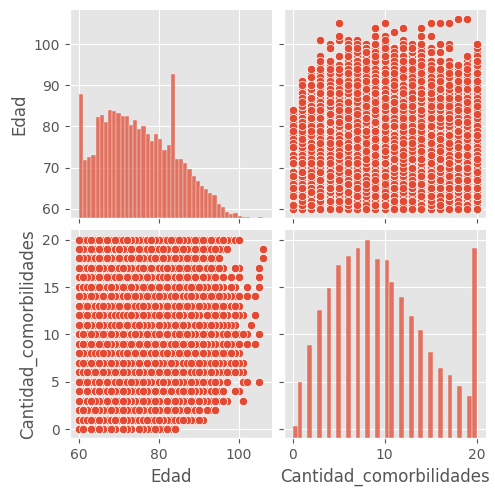

In [115]:
#Visualización de variables numéricas

sns.pairplot(d[Vnumericas])
plt.show()

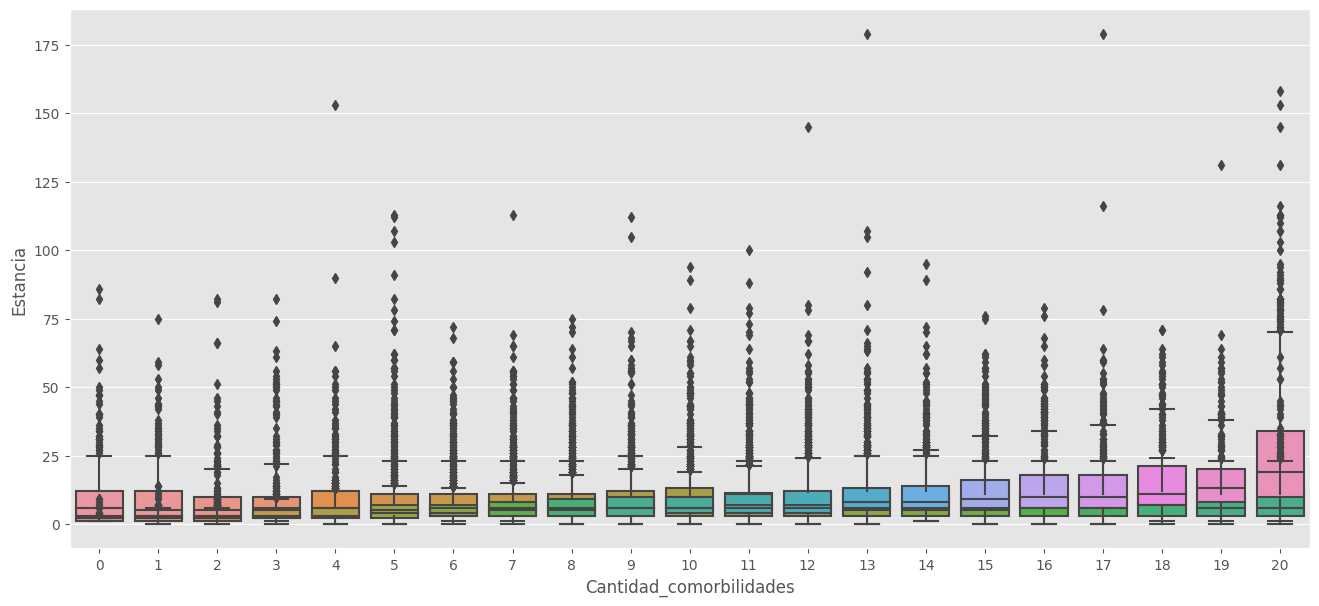

In [116]:
#Visualización por medio de gráficos de caja de bigotes para la cantidad de comorbilidades con respecto a la estancia
plot_multiples_graficas (d, Vnumericas, 1, 1, 'b', 'Estancia', (16,7))

Variable de salida: Estancia

In [117]:
# Exploramos la variable de salida
d.groupby('Estancia').Estancia.count().sort_values(ascending=False)

Estancia
2      2088
3      1948
4      1718
1      1513
5      1399
       ... 
90        1
88        1
63        1
73        1
179       1
Name: Estancia, Length: 104, dtype: int64

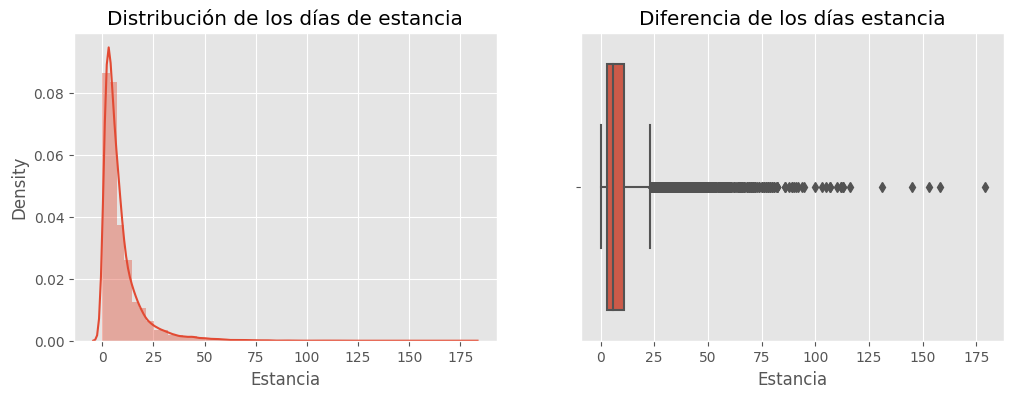

In [118]:
#Histográma y caja de bigotes para los dias de estancia

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de los días de estancia')
sns.distplot(d['Estancia'])

plt.subplot(1,2,2)
plt.title('Diferencia de los días estancia')
sns.boxplot(x=d['Estancia'])

plt.show()

In [119]:
#Descripción de los días de estancia: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['Estancia'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   18092
mean        9
std        10
min         0
25%         3
50%         6
75%        11
85%        15
90%        19
95%        28
97.5%      38
100%      179
max       179
Name: Estancia, dtype: float64


## Preparación de datos

### Valores atípicos de la variable de salida

In [120]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(d['Estancia'], 25, interpolation = 'midpoint')
Q3 = np.percentile(d['Estancia'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')

Valor atípico leve inferior:-9.0
Valor atípico leve superior:23.0


In [121]:
# Se eliminan los valores atípicos
d1 = d.drop(d[d['Estancia']>VASup].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

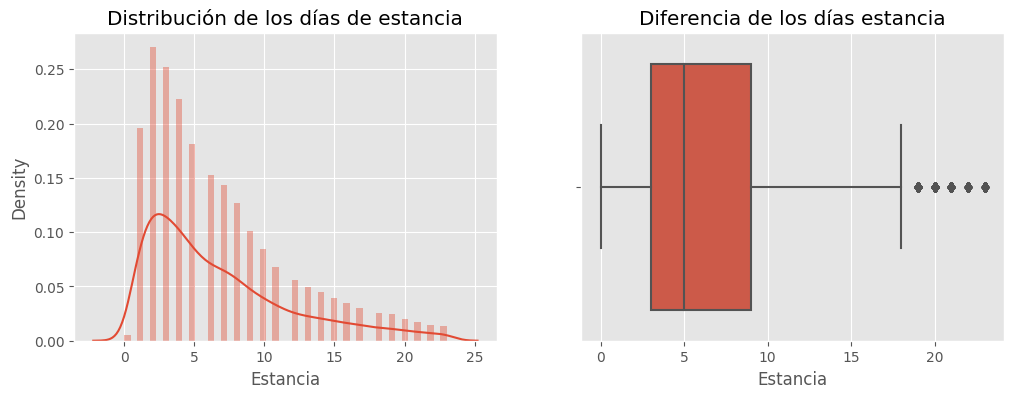

In [122]:
#Histográma y caja de bigotes de los días de estancia

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de los días de estancia')
sns.distplot(d1['Estancia'])

plt.subplot(1,2,2)
plt.title('Diferencia de los días estancia')
sns.boxplot(x=d1['Estancia'])

plt.show()

In [123]:
#Descripción de los días de estancia después de eliminar valores atípicos

print(d1['Estancia'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   16799
mean        7
std         5
min         0
25%         3
50%         5
75%         9
85%        12
90%        15
95%        18
97.5%      20
100%       23
max        23
Name: Estancia, dtype: float64


In [124]:
print(d.shape)
print(d1.shape)

(18092, 12)
(16799, 12)


### Imputaciones

No se realiza imputación en las variables ya que los unicaos con valores nulos son los campos de diagnostico y estos no pueden ser imputados ya que no seria lo correcto para el negocio.

In [125]:
#Integración de los dos dataframes (categoricos y numéricos) después de la imputación
d2 = pd.merge(d1[Vnumericas], d1[Vcategoricas], left_index=True, right_index=True)
d2.head()

,Edad,Cantidad_comorbilidades,Sexo,Diagnostico_principal_Egreso,Tuvo_cx,Procedimiento_1,Ventilacion_Mecanica,Situacion_al_alta,UCI,UCE,Nombre_Especialidad_Egreso
0,67,8,2,S728,Si,Si,No,1,No,No,ORTOPEDIA Y TRAUMATOLOGIA
1,90,6,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA
2,91,11,2,U071,No,Si,No,2,No,No,MEDICINA INTERNA
3,85,18,1,M808,No,Si,No,1,No,No,NEUROCIRUGIA
4,86,11,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA


In [126]:
# Se concatenan los dataframes horizontalmente con a variable de salida
df_final = pd.concat([d2, d1['Estancia']], axis=1)

In [127]:
# Se visualiza el nuevo Dataframe concatenado con todas las caracteristicas y las variables de salida
df_final.head()

,Edad,Cantidad_comorbilidades,Sexo,Diagnostico_principal_Egreso,Tuvo_cx,Procedimiento_1,Ventilacion_Mecanica,Situacion_al_alta,UCI,UCE,Nombre_Especialidad_Egreso,Estancia
0,67,8,2,S728,Si,Si,No,1,No,No,ORTOPEDIA Y TRAUMATOLOGIA,2
1,90,6,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA,8
2,91,11,2,U071,No,Si,No,2,No,No,MEDICINA INTERNA,7
3,85,18,1,M808,No,Si,No,1,No,No,NEUROCIRUGIA,2
4,86,11,1,U071,No,Si,No,1,No,No,MEDICINA INTERNA,3


## Prueba dataset: Creación de un modelo de regresión

### Líbrerías

In [128]:
# Preparación de datos
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Modelado
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor


# Evaluación de modelos
# ==============================================================================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Creación de Variables Dummies

In [129]:
# Aplicación de la función de get_dummies

df =pd.get_dummies(df_final, drop_first=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16799 entries, 0 to 18091
Columns: 1749 entries, Edad to Nombre_Especialidad_Egreso_UROLOGIA ONCOLOGICA
dtypes: int64(3), uint8(1746)
memory usage: 29.0 MB


### Dividir el conjunto de datos

In [130]:
#Se crea una lista con todas las varibles de entrada

vDep = list(df.columns)
vDep.remove('Estancia')

print(vDep)

['Edad', 'Cantidad_comorbilidades', 'Sexo_2', 'Diagnostico_principal_Egreso_A028', 'Diagnostico_principal_Egreso_A038', 'Diagnostico_principal_Egreso_A040', 'Diagnostico_principal_Egreso_A042', 'Diagnostico_principal_Egreso_A045', 'Diagnostico_principal_Egreso_A047', 'Diagnostico_principal_Egreso_A049', 'Diagnostico_principal_Egreso_A059', 'Diagnostico_principal_Egreso_A060', 'Diagnostico_principal_Egreso_A063', 'Diagnostico_principal_Egreso_A064', 'Diagnostico_principal_Egreso_A071', 'Diagnostico_principal_Egreso_A084', 'Diagnostico_principal_Egreso_A090', 'Diagnostico_principal_Egreso_A099', 'Diagnostico_principal_Egreso_A150', 'Diagnostico_principal_Egreso_A152', 'Diagnostico_principal_Egreso_A153', 'Diagnostico_principal_Egreso_A155', 'Diagnostico_principal_Egreso_A156', 'Diagnostico_principal_Egreso_A157', 'Diagnostico_principal_Egreso_A161', 'Diagnostico_principal_Egreso_A168', 'Diagnostico_principal_Egreso_A180', 'Diagnostico_principal_Egreso_A183', 'Diagnostico_principal_Egreso

In [132]:
# División de los datos en train y test


# Se establecen los dataframes de con las variables de entrada X y la variable de salida y
X = df[vDep]
y = df['Estancia']

In [133]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [134]:
#Escalar Variables

# Se establece la configuración para que los valores numéricos se vean con 4 decimales
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[Vnumericas] = scaler.fit_transform(X_train[Vnumericas])
X_test[Vnumericas] = scaler.fit_transform(X_test[Vnumericas])

X_train.head()

,Edad,Cantidad_comorbilidades,Sexo_2,Diagnostico_principal_Egreso_A028,Diagnostico_principal_Egreso_A038,Diagnostico_principal_Egreso_A040,Diagnostico_principal_Egreso_A042,Diagnostico_principal_Egreso_A045,Diagnostico_principal_Egreso_A047,Diagnostico_principal_Egreso_A049,...,Nombre_Especialidad_Egreso_ORTOPEDIA ONCOLOGICA,Nombre_Especialidad_Egreso_ORTOPEDIA Y TRAUMATOLOGIA,Nombre_Especialidad_Egreso_OTOLOGÃA Y OTONEUROLOGÃA,Nombre_Especialidad_Egreso_OTORRINOLARINGOLOGIA,Nombre_Especialidad_Egreso_TOXICOLOGIA CLINICA,Nombre_Especialidad_Egreso_TRASPLANTE DE INTESTINO DELGADO,Nombre_Especialidad_Egreso_TRASPLANTE HEPATICO,Nombre_Especialidad_Egreso_TRASPLANTE RENAL ADULTO,Nombre_Especialidad_Egreso_UROLOGIA,Nombre_Especialidad_Egreso_UROLOGIA ONCOLOGICA
4715,0.5217,0.5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6806,0.3696,0.3000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13468,0.4565,0.4500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4648,0.4565,0.0500,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5102,0.2826,0.7000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creación del un modelo

In [136]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad

modelo = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'friedman_mse',
            max_depth    = 5,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 1234
         )


# Entrenamiento del modelo

modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', n_jobs=-1, random_state=1234)

In [137]:
# Error del dataset de entrenamiento

predicciones = modelo.predict(X = X_train)

# Se calcula el rmse
rmse = mean_squared_error(y_true  = y_train, y_pred  = predicciones, squared = False)
print(f"El error rmse de test es: {rmse}")

# Se calcula el r^2
r2 = r2_score(y_train, predicciones)
print(f"El error R^2 de test es: {r2}")

El error rmse de test es: 4.225308460469824
El error R^2 de test es: 0.32168981783234063


In [138]:
# Error del dataset de prueba

predicciones = modelo.predict(X = X_test)

# Se calcula el rmse
rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error rmse de test es: {rmse}")

# Se calcula el r^2
r2 = r2_score(y_test, predicciones)
print(f"El error r^2 de test es: {r2}")

El error rmse de test es: 4.279815004438982
El error r^2 de test es: 0.31062396405285164


In [141]:
#Evaluación de importancia de los predictores
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,Cantidad_comorbilidades,0.6475
1698,Tuvo_cx_Si,0.1348
1702,UCI_Si,0.0470
1728,Nombre_Especialidad_Egreso_MEDICINA CRITICA Y ...,0.0314
1699,Procedimiento_1_Si,0.0274
...,...,...
654,Diagnostico_principal_Egreso_I251,0.0000
653,Diagnostico_principal_Egreso_I250,0.0000
652,Diagnostico_principal_Egreso_I221,0.0000
651,Diagnostico_principal_Egreso_I220,0.0000


Se realiza una busqueda de importancia de los predictores y se identifica que algunas categorias como tipos de diagnisticos o especialidades no aportan a la predicción de este modelo.
Es importante correr nuevos modelos realizando una depuración de caracteristicas y ver como este cambio influye en la precisión de la predicción.